In [2]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df_train = pd.read_csv("../train.csv")
df_test =  pd.read_csv("../test.csv")

#preverving houses ID
train_ID = df_train['Id']
test_ID = df_test['Id']

df_train.drop("Id", axis = 1, inplace = True)
df_test.drop("Id", axis = 1, inplace = True)


#We find out there is missing data, therefore lets combine there dataframe
#to big one and do data clearning

ntrain = df_train.shape[0]
ntest = df_test.shape[0]

y_train = df_train.SalePrice.values

all_data = pd.concat((df_train, df_test)).reset_index(drop=True)

#all_data.drop(['SalePrice'], axis=1, inplace=True) #drop SalePrice

all_data.shape #Checking dataframe size

#Identify features with missing data
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})


#Impute based on description.txt
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
all_data["GarageQual"] = all_data["GarageQual"].fillna("None")
all_data["GarageCond"] = all_data["GarageCond"].fillna("None")
all_data["GarageFinish"] = all_data["GarageFinish"].fillna("None")
all_data["GarageType"] = all_data["GarageType"].fillna("None")
all_data["BsmtExposure"] = all_data["BsmtExposure"].fillna("None")
all_data["BsmtCond"] = all_data["BsmtCond"].fillna("None")
all_data["BsmtQual"] = all_data["BsmtQual"].fillna("None")
all_data["BsmtFinType1"] = all_data["BsmtFinType1"].fillna("None")
all_data["BsmtFinType2"] = all_data["BsmtFinType2"].fillna("None")
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["Functional"] = all_data["Functional"].fillna("Typ")


#ASSUMPTION ************
#LotFrontage -> fill in missing values by the median LotFrontage of the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
#************


#ASSUMPTION ************
#GarageYrBlt, GarageArea, GarageCars
#For these categorical garage-related NA means that there is no garage
all_data["GarageYrBlt"] = all_data["GarageYrBlt"].fillna(0)
all_data["GarageArea"] = all_data["GarageArea"].fillna(0)
all_data["GarageCars"] = all_data["GarageCars"].fillna(0)


#BsmtFullBath, BsmtHalfBath, BsmtUnfSF, TotalBsmtSF, BsmtFinSF1, BsmtFinSF2
#For these categorical basement-related NA means that there is no basement
all_data["BsmtFullBath"] = all_data["BsmtFullBath"].fillna(0)
all_data["BsmtHalfBath"] = all_data["BsmtHalfBath"].fillna(0)
all_data["BsmtUnfSF"] = all_data["BsmtUnfSF"].fillna(0)
all_data["TotalBsmtSF"] = all_data["TotalBsmtSF"].fillna(0)
all_data["BsmtFinSF2"] = all_data["BsmtFinSF2"].fillna(0)
all_data["BsmtFinSF1"] = all_data["BsmtFinSF1"].fillna(0)

#MasVnrArea NA means no masonry veneer for these houses, therefore We can fill 0
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
#************

#MSSubClass -> NA means No building class. We can replace missing values with None
all_data["MSSubClass"] = all_data["MSSubClass"].fillna("None")

#************

#ASSUMPTION *************

#MSZoning -> There is only 4 NA value, lets compute this with most comon value
# of the entire dataframe.
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

#Utilities -> There is only 2 NA value, lets compute this with most comon value
# of the entire dataframe.
all_data['Utilities'] = all_data['Utilities'].fillna(all_data['Utilities'].mode()[0])

#Electrical -> There is only 1 NA value, lets compute this with most comon value
# of the entire dataframe.
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

#KitchenQual -> There is only 1 NA value, lets compute this with most comon value
# of the entire dataframe.
#KitchenQual -> data description says NA means "None".
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

#Exterior1st -> There is only 1 NA value, lets compute this with most comon value
# of the entire dataframe.
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])

#Exterior2nd -> There is only 1 NA value, lets compute this with most comon value
# of the entire dataframe.
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

#SaleType -> There is only 1 NA value, lets compute this with most comon value
# of the entire dataframe.
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
#************

train_df = all_data[:ntrain]
test_df = all_data[ntrain:]

/Users/babu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [4]:
char_cols = train_df.dtypes.pipe(lambda x: x[x == 'object']).index
char_cols

Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood',
       'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SaleType', 'Street', 'Utilities'],
      dtype='object')

In [5]:
def changeQualityToInt(val):
    if(val == 'Ex'):
        return 5
    elif(val == 'Gd'):
        return 4
    elif(val == 'TA'):
        return 3
    elif(val == 'Fa'):
        return 2
    elif(val == 'Po'):
        return 1
    else:
        return 0


def changeGarageFinishToInt(val):
    if(val == 'Fin'):
        return 3
    elif(val == 'RFn'):
        return 2
    elif(val == 'Unf'):
        return 1
    else:
        return 0



train_df['BsmtCond'] = pd.DataFrame(list(map(changeQualityToInt, train_df['BsmtCond'])))
train_df['BsmtQual'] = pd.DataFrame(list(map(changeQualityToInt, train_df['BsmtQual'])))
train_df['PoolQC'] = pd.DataFrame(list(map(changeQualityToInt, train_df['PoolQC'])))
train_df['KitchenQual'] = pd.DataFrame(list(map(changeQualityToInt, train_df['KitchenQual'])))
train_df['HeatingQC'] = pd.DataFrame(list(map(changeQualityToInt, train_df['HeatingQC'])))
train_df['GarageQual'] = pd.DataFrame(list(map(changeQualityToInt, train_df['GarageQual'])))
train_df['GarageCond'] = pd.DataFrame(list(map(changeQualityToInt, train_df['GarageCond'])))
train_df['GarageFinish'] = pd.DataFrame(list(map(changeGarageFinishToInt, train_df['GarageFinish'])))
train_df['FireplaceQu'] = pd.DataFrame(list(map(changeQualityToInt, train_df['FireplaceQu'])))
train_df['ExterCond'] = pd.DataFrame(list(map(changeQualityToInt, train_df['ExterCond'])))
train_df['ExterQual'] = pd.DataFrame(list(map(changeQualityToInt, train_df['ExterQual'])))

/Users/babu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/babu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/babu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable

In [6]:
res = train_df[['BsmtCond', 'BsmtQual', 'PoolQC' , 'KitchenQual', 'HeatingQC', 'GarageQual', 'GarageCond', 'GarageFinish', 'FireplaceQu', 'ExterCond', 'ExterQual', 'SalePrice']]

res = res.corr()

#res[res['SalePrice'] > 0.5].sort_values(by='SalePrice', ascending=False)
ser = (res.loc['SalePrice']).sort_values(ascending=False).head(10)
ser.drop('SalePrice')

ExterQual       0.682639
KitchenQual     0.659600
BsmtQual        0.585207
GarageFinish    0.549247
FireplaceQu     0.520438
HeatingQC       0.427649
GarageQual      0.273839
GarageCond      0.263191
BsmtCond        0.212607
Name: SalePrice, dtype: float64

Text(0, 0.5, 'Sale Price')

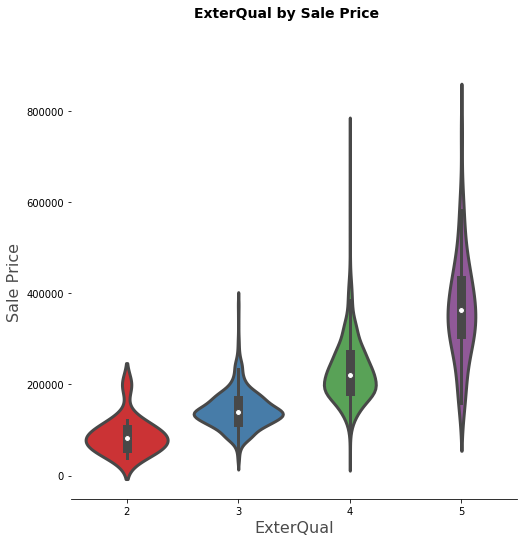

In [7]:
# Show each distribution with both violins and points
f, ax = plt.subplots(figsize=(8, 8))
sns.violinplot(x="ExterQual",y="SalePrice",data=train_df, inner="box", palette="Set1", cut=2, linewidth=3)

sns.despine(left=True)

f.suptitle('ExterQual by Sale Price', fontsize=14, fontweight='bold')
ax.set_xlabel("ExterQual",size = 16,alpha=0.7)
ax.set_ylabel("Sale Price",size = 16,alpha=0.7)

Text(0, 0.5, 'Sale Price')

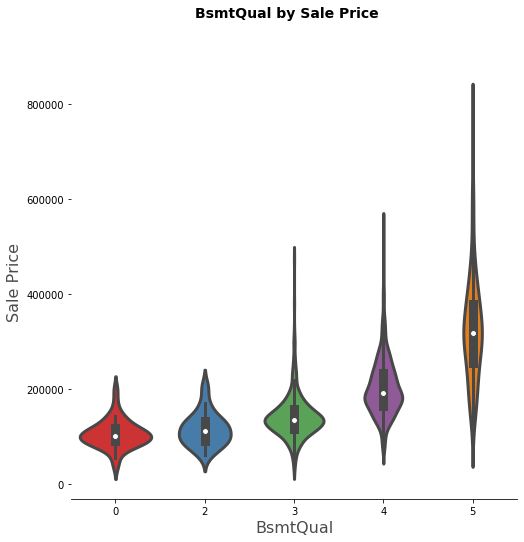

In [8]:
# Show each distribution with both violins and points
f, ax = plt.subplots(figsize=(8, 8))
sns.violinplot(x="BsmtQual",y="SalePrice",data=train_df, inner="box", palette="Set1", cut=2, linewidth=3)

sns.despine(left=True)

f.suptitle('BsmtQual by Sale Price', fontsize=14, fontweight='bold')
ax.set_xlabel("BsmtQual",size = 16,alpha=0.7)
ax.set_ylabel("Sale Price",size = 16,alpha=0.7)

Text(0, 0.5, 'Sale Price')

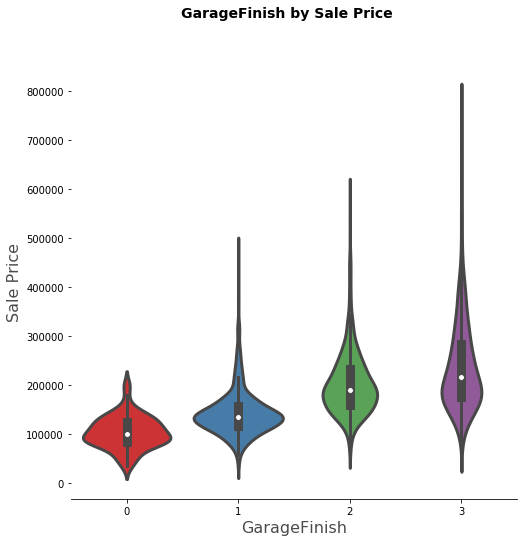

In [9]:
# Show each distribution with both violins and points
f, ax = plt.subplots(figsize=(8, 8))
sns.violinplot(x="GarageFinish",y="SalePrice",data=train_df, inner="box", palette="Set1", cut=2, linewidth=3)

sns.despine(left=True)

f.suptitle('GarageFinish by Sale Price', fontsize=14, fontweight='bold')
ax.set_xlabel("GarageFinish",size = 16,alpha=0.7)
ax.set_ylabel("Sale Price",size = 16,alpha=0.7)

Text(0, 0.5, 'Sale Price')

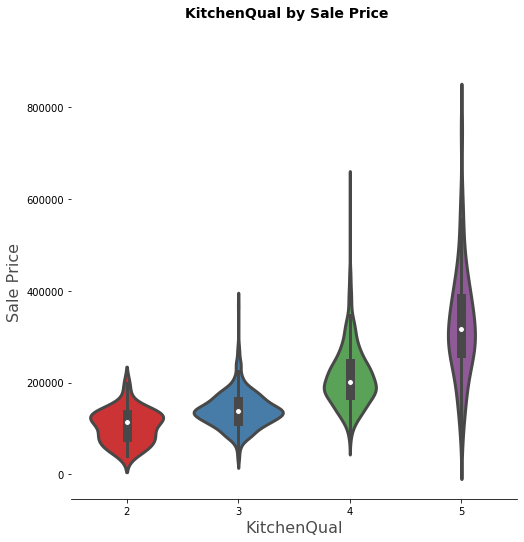

In [10]:
# Show each distribution with both violins and points
f, ax = plt.subplots(figsize=(8, 8))
sns.violinplot(x="KitchenQual",y="SalePrice",data=train_df, inner="box", palette="Set1", cut=2, linewidth=3)

sns.despine(left=True)

f.suptitle('KitchenQual by Sale Price', fontsize=14, fontweight='bold')
ax.set_xlabel("KitchenQual",size = 16,alpha=0.7)
ax.set_ylabel("Sale Price",size = 16,alpha=0.7)

Text(0, 0.5, 'Sale Price')

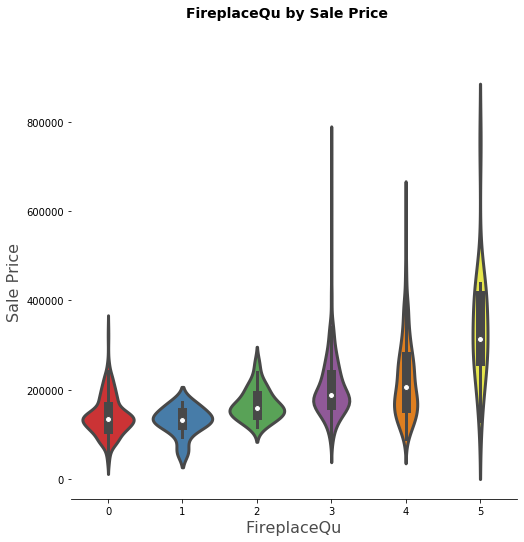

In [11]:
# Show each distribution with both violins and points
f, ax = plt.subplots(figsize=(8, 8))
sns.violinplot(x="FireplaceQu",y="SalePrice",data=train_df, inner="box", palette="Set1", cut=2, linewidth=3)

sns.despine(left=True)

f.suptitle('FireplaceQu by Sale Price', fontsize=14, fontweight='bold')
ax.set_xlabel("FireplaceQu",size = 16,alpha=0.7)
ax.set_ylabel("Sale Price",size = 16,alpha=0.7)